# Capstone Project-1: Home Credit Default Risk

## In-Depth Analysis

In this section, machine learning will be utilized to build the model.

In [1]:
import pandas as pd
import numpy as np

import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# display all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

### Data Preparation

In [3]:
app_train = pd.read_csv("application_train.csv",na_values=' ')

### a. Dealing with Missing Data

In [4]:
#show the number of missing data for each column
print(app_train.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [5]:
#fill missing data in multiple columns with their mean 
x=['AMT_ANNUITY','AMT_GOODS_PRICE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
   'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
   'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','APARTMENTS_MEDI',
   'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
   'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
   'NONLIVINGAREA_MEDI']

for i in x:
    app_train.loc[app_train[i].isnull(),i]=app_train[i].fillna(app_train[i].mean())


#fill in missing data by most frequent categorical value 
y=['NAME_TYPE_SUITE','OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
   'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','FONDKAPREMONT_MODE','HOUSETYPE_MODE',
   'WALLSMATERIAL_MODE']

for i in y:
    app_train.loc[app_train[i].isnull(),i]=app_train[i].fillna(app_train[i].mode()[0])
    
    
#fill in missing data with 0 
z=['NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
   'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','APARTMENTS_MODE','BASEMENTAREA_MODE',
   'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
   'FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
   'NONLIVINGAREA_MODE','TOTALAREA_MODE']

for i in z:
    app_train.loc[app_train[i].isnull(),i]=app_train[i].fillna(0)

### b. Handling  Categorical Variables

In [7]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
app_train_cats = _get_categorical_features(app_train)

# create additional dummy features
app_train = _get_dummies(app_train, app_train_cats) 

In [8]:
#After encoding, drop categorical columns
app_train_cat = app_train.select_dtypes(include=[object])
app_train=app_train.drop(app_train_cat,axis=1)
app_train.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business

### c. Split Dataset into Train and Test parts

In [9]:
#Because light GBM do not support special JSON characters in feature name
app_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in app_train.columns]

In [10]:
#set up Target variable
y = app_train.TARGET 
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [11]:
#set up dependent Variables
X = app_train.drop(['TARGET'], axis=1)
X.head(3)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash_loans,NAME_CONTRACT_TYPE_Revolving_loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group_of_people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse__partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Maternity_leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co_op_apartment,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low_skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters_barmen_staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_T

In [12]:
#split app_train into 70% train and 30% test parts.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Approach 1: Baseline Model 

Check regression accuracy first

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string


def run_regression_accuracy(X_train, y_train, X_test, y_test):
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
  cm = confusion_matrix(y_test, y_pred)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(y_test, y_pred))

  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  return logreg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.92

Confusion matrix: 
 [[84840     1]
 [ 7413     0]]

Classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



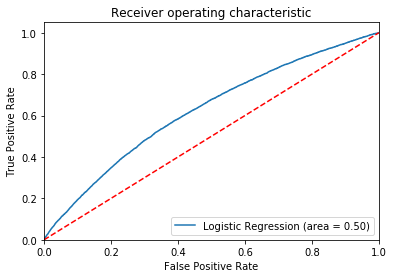

In [15]:
X_test=X_test[X_train.columns]
logreg = run_regression_accuracy(X_train, y_train, X_test, y_test)

Run several classifer models to compare ROC_AUC scores.

### 1.1 Lightgbm Classifier 

In [13]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


clf = LGBMClassifier(
            nthread=4,
            n_estimators=200,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)

def eval(X_test, y_test, pthresh):
    y_predict=clf.predict_proba(X_test)
    ypredict = y_predict[:,1]
    y_pred=[]
    #convert into binary values
    for i in range(len(ypredict)):
        if ypredict[i]>=pthresh:
            y_pred.append(1)
        else:
            y_pred.append(0)

    print('\nConfusion_matrix:  \n', confusion_matrix(y_test, y_pred))
    print('\nClassification report: \n{}\n'.format(classification_report(y_test, y_pred)))
    print('ROC-AUC score of the model:   {}'.format(roc_auc_score(y_test, ypredict)))

eval(X_test, y_test, 0.3)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.770867	training's binary_logloss: 0.2434	valid_1's auc: 0.752226	valid_1's binary_logloss: 0.247601
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.770867	training's binary_logloss: 0.2434	valid_1's auc: 0.752226	valid_1's binary_logloss: 0.247601

Confusion_matrix:  
 [[83788  1053]
 [ 6685   728]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     84841
           1       0.41      0.10      0.16      7413

    accuracy                           0.92     92254
   macro avg       0.67      0.54      0.56     92254
weighted avg       0.88      0.92      0.89     92254


ROC-AUC score of the model:   0.7522257459682484


### 1.2 RandomForest Classifier 

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=200,
                            random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5001905604737972

In [17]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84839,     2],
       [ 7410,     3]], dtype=int64)

### 1.3  XGBooster Classifier

In [18]:
from sklearn import datasets
import xgboost as xgb

xg_classifier = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 100)

xg_classifier.fit(X_train, y_train)

y_pred2 = xg_classifier.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5083663311963755

In [19]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84727,   114],
       [ 7279,   134]], dtype=int64)

### 1.4  CatBooster Classifier

In [20]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_seed=42,
                         logging_level='Silent',
                         eval_metric='Accuracy')

cat.fit(X_train, y_train)

y_pred2 = cat.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5127446516061206

In [21]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84623,   218],
       [ 7205,   208]], dtype=int64)

So far, lightgbm classifier gets the best score comparing to other models.

# Approach 2: Combine with Supplementary Dataset

### 2.1 Read Supplementary Datasets

### 2.1.1 Bureau Data

In [4]:
bureau = pd.read_csv("bureau.csv")
bureau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


### 2.1.2 Pos Cash Balance

In [5]:
pcb = pd.read_csv("POS_CASH_balance.csv")
pcb.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


### 2.1.3 Previous Application

In [6]:
previous_application = pd.read_csv("previous_application.csv")
previous_application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


### 2.1.4 Previous Installments

In [7]:
installments_payments = pd.read_csv("installments_payments.csv")
installments_payments.head(3)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


### 2.1.5 Credit Card Balance

In [8]:
credit_card_balance=pd.read_csv('credit_card_balance.csv')
credit_card_balance.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


### 2.2 Handling Categorical Features

In [9]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
app_train_cats = _get_categorical_features(app_train)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features
app_train = _get_dummies(app_train, app_train_cats) 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

In [10]:
#After encoding, drop categorical columns
app_train_cat = app_train.select_dtypes(include=[object])
app_train=app_train.drop(app_train_cat,axis=1)
app_train.head(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business

In [11]:
previous_application_cat = previous_application.select_dtypes(include=[object])
previous_application=previous_application.drop(previous_application_cat,axis=1)
previous_application.head(3)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NAME_CASH_LOAN_PURPOSE_Building a house or an annex,NAME_CASH_LOAN_PURPOSE_Business development,NAME_CASH_LOAN_PURPOSE_Buying a garage,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,NAME_CASH_LOAN_PURPOSE_Buying a home,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Car repairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,NAME_CASH_LOAN_PURPOSE_Furniture,NAME_CASH_LOAN_PURPOSE_Gasification / water supply,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Money for a third person,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,NAME_PAYMENT_TYPE_Cash through the bank,NAME_PAYMENT_TYPE_Cashless from the account of the employer,NAME_PAYMENT_TYPE_Non-cash from your account,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_Additional Service,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_Audio/Video,NAME_GOODS_CATEGORY_Auto Accessories,NAME_GOODS_CATEGORY_Clothing and Accessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_Construction Materials,NAME_GOODS_CATEGORY_Consumer Electronics,NAME_GOODS_CATEGORY_Direct Sales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_House Construction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_Medical Supplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_PRODUCT_TYPE_x-sell,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE_Stone,NAME_SELLER_INDUSTRY_Auto technology,NAME_SELLER_INDUSTRY_Clothing,NAME_SELLER_INDUSTRY_Connectiv

In [12]:
bureau_cat = bureau.select_dtypes(include=[object])
bureau=bureau.drop(bureau_cat,axis=1)
bureau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
pcb_cat = pcb.select_dtypes(include=[object])
pcb=pcb.drop(pcb_cat,axis=1)
pcb.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,1803195,182943,-31,48.0,45.0,0,0,1,0,0,0,0,0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,1,0,0,0,0,0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
credit_card_balance_cat = credit_card_balance.select_dtypes(include=[object])
credit_card_balance=credit_card_balance.drop(credit_card_balance_cat,axis=1)
credit_card_balance.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Sent proposal,NAME_CONTRACT_STATUS_Signed
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,1,0,0,0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,1,0,0,0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,1,0,0,0,0,0,0


### 2.3  Feature Engineering 

### 2.3.1 Feature Engineering -Bureau Data

In [15]:
# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
data = app_train.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.2 Feature Engineering - Pos Cash Blance

In [16]:
### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['SK_ID_PREV'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.3 Feature Engineering - Previous Application

In [17]:
## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['SK_ID_PREV'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.4 Feature Engineering - Previous Installments

In [18]:
## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.5 Feature Engineering - Credit Card Balance

In [19]:
### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['SK_ID_PREV'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

### 2.4 Fill in missing data with various strategies

In [20]:
print(data.isnull().sum()) #check missing values

SK_ID_CURR                                                            0
TARGET                                                                0
CNT_CHILDREN                                                          0
AMT_INCOME_TOTAL                                                      0
AMT_CREDIT                                                            0
AMT_ANNUITY                                                          12
AMT_GOODS_PRICE                                                     278
REGION_POPULATION_RELATIVE                                            0
DAYS_BIRTH                                                            0
DAYS_EMPLOYED                                                         0
DAYS_REGISTRATION                                                     0
DAYS_ID_PUBLISH                                                       0
OWN_CAR_AGE                                                      202929
FLAG_MOBIL                                                      

In [21]:
#fill missing data in multiple columns with their mean 
x=['AMT_ANNUITY','AMT_GOODS_PRICE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
   'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
   'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','APARTMENTS_MEDI',
   'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
   'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
   'NONLIVINGAREA_MEDI','b_SK_ID_BUREAU','b_DAYS_CREDIT','b_CREDIT_DAY_OVERDUE','b_DAYS_CREDIT_ENDDATE','b_DAYS_ENDDATE_FACT',
   'b_AMT_CREDIT_MAX_OVERDUE','b_CNT_CREDIT_PROLONG','b_AMT_CREDIT_SUM','b_AMT_CREDIT_SUM_DEBT','b_AMT_CREDIT_SUM_LIMIT',
   'b_AMT_CREDIT_SUM_OVERDUE','b_DAYS_CREDIT_UPDATE','b_AMT_ANNUITY','b_buro_count','SK_ID_PREV','MONTHS_BALANCE',
   'CNT_INSTALMENT','CNT_INSTALMENT_FUTURE','SK_DPD','SK_DPD_DEF','p_SK_ID_PREV','p_AMT_ANNUITY','p_AMT_APPLICATION',
   'p_AMT_CREDIT','p_AMT_DOWN_PAYMENT','p_AMT_GOODS_PRICE','p_HOUR_APPR_PROCESS_START','p_NFLAG_LAST_APPL_IN_DAY',
   'p_RATE_DOWN_PAYMENT','p_RATE_INTEREST_PRIMARY','p_RATE_INTEREST_PRIVILEGED','p_DAYS_DECISION','p_SELLERPLACE_AREA',
   'p_CNT_PAYMENT','p_DAYS_FIRST_DRAWING','p_DAYS_FIRST_DUE','p_DAYS_LAST_DUE_1ST_VERSION','p_DAYS_LAST_DUE',
   'p_DAYS_TERMINATION','p_NFLAG_INSURED_ON_APPROVAL','i_SK_ID_PREV','i_NUM_INSTALMENT_VERSION','i_NUM_INSTALMENT_NUMBER',
   'i_DAYS_INSTALMENT','i_DAYS_ENTRY_PAYMENT','i_AMT_INSTALMENT','i_AMT_PAYMENT','cc_bal_SK_ID_PREV','cc_bal_MONTHS_BALANCE',
   'cc_bal_AMT_BALANCE','cc_bal_AMT_CREDIT_LIMIT_ACTUAL','cc_bal_AMT_DRAWINGS_ATM_CURRENT','cc_bal_AMT_DRAWINGS_CURRENT',
   'cc_bal_AMT_DRAWINGS_OTHER_CURRENT','cc_bal_AMT_DRAWINGS_POS_CURRENT','cc_bal_AMT_INST_MIN_REGULARITY',
   'cc_bal_AMT_PAYMENT_CURRENT','cc_bal_AMT_PAYMENT_TOTAL_CURRENT','cc_bal_AMT_RECEIVABLE_PRINCIPAL','cc_bal_AMT_RECIVABLE',
   'cc_bal_AMT_TOTAL_RECEIVABLE','cc_bal_CNT_DRAWINGS_ATM_CURRENT','cc_bal_CNT_DRAWINGS_CURRENT',
   'cc_bal_CNT_DRAWINGS_OTHER_CURRENT','cc_bal_CNT_DRAWINGS_POS_CURRENT','cc_bal_CNT_INSTALMENT_MATURE_CUM','cc_bal_SK_DPD',
   'cc_bal_SK_DPD_DEF','b_CREDIT_ACTIVE_Active','b_CREDIT_ACTIVE_Bad debt', 'b_CREDIT_ACTIVE_Closed', 'b_CREDIT_ACTIVE_Sold', 
   'b_CREDIT_CURRENCY_currency 1', 'b_CREDIT_CURRENCY_currency 2', 'b_CREDIT_CURRENCY_currency 3', 
   'b_CREDIT_CURRENCY_currency 4', 'b_CREDIT_TYPE_Another type of loan', 'b_CREDIT_TYPE_Car loan',
   'b_CREDIT_TYPE_Cash loan (non-earmarked)','b_CREDIT_TYPE_Consumer credit','b_CREDIT_TYPE_Credit card',
   'b_CREDIT_TYPE_Interbank credit','b_CREDIT_TYPE_Loan for business development',
   'b_CREDIT_TYPE_Loan for purchase of shares (margin lending)','b_CREDIT_TYPE_Loan for the purchase of equipment',
   'b_CREDIT_TYPE_Loan for working capital replenishment','b_CREDIT_TYPE_Microloan','b_CREDIT_TYPE_Mobile operator loan',
   'b_CREDIT_TYPE_Mortgage','b_CREDIT_TYPE_Real estate loan','b_CREDIT_TYPE_Unknown type of loan','NAME_CONTRACT_STATUS_Active',
   'NAME_CONTRACT_STATUS_Amortized debt','NAME_CONTRACT_STATUS_Approved','NAME_CONTRACT_STATUS_Canceled',
   'NAME_CONTRACT_STATUS_Completed','NAME_CONTRACT_STATUS_Demand','NAME_CONTRACT_STATUS_Returned to the store',
   'NAME_CONTRACT_STATUS_Signed','NAME_CONTRACT_STATUS_XNA','p_NAME_CONTRACT_TYPE_Cash loans',
   'p_NAME_CONTRACT_TYPE_Consumer loans','p_NAME_CONTRACT_TYPE_Revolving loans','p_NAME_CONTRACT_TYPE_XNA',
   'p_WEEKDAY_APPR_PROCESS_START_FRIDAY','p_WEEKDAY_APPR_PROCESS_START_MONDAY','p_WEEKDAY_APPR_PROCESS_START_SATURDAY',
   'p_WEEKDAY_APPR_PROCESS_START_SUNDAY','p_WEEKDAY_APPR_PROCESS_START_THURSDAY','p_WEEKDAY_APPR_PROCESS_START_TUESDAY',
   'p_WEEKDAY_APPR_PROCESS_START_WEDNESDAY','p_FLAG_LAST_APPL_PER_CONTRACT_N','p_FLAG_LAST_APPL_PER_CONTRACT_Y',
   'p_NAME_CASH_LOAN_PURPOSE_Building a house or an annex','p_NAME_CASH_LOAN_PURPOSE_Business development',
   'p_NAME_CASH_LOAN_PURPOSE_Buying a garage','p_NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
   'p_NAME_CASH_LOAN_PURPOSE_Buying a home','p_NAME_CASH_LOAN_PURPOSE_Buying a new car',
   'p_NAME_CASH_LOAN_PURPOSE_Buying a used car','p_NAME_CASH_LOAN_PURPOSE_Car repairs','p_NAME_CASH_LOAN_PURPOSE_Education',
   'p_NAME_CASH_LOAN_PURPOSE_Everyday expenses','p_NAME_CASH_LOAN_PURPOSE_Furniture',
   'p_NAME_CASH_LOAN_PURPOSE_Gasification / water supply','p_NAME_CASH_LOAN_PURPOSE_Hobby','p_NAME_CASH_LOAN_PURPOSE_Journey',
   'p_NAME_CASH_LOAN_PURPOSE_Medicine','p_NAME_CASH_LOAN_PURPOSE_Money for a third person','p_NAME_CASH_LOAN_PURPOSE_Other',
   'p_NAME_CASH_LOAN_PURPOSE_Payments on other loans','p_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment',
   'p_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal','p_NAME_CASH_LOAN_PURPOSE_Repairs',
   'p_NAME_CASH_LOAN_PURPOSE_Urgent needs','p_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday','p_NAME_CASH_LOAN_PURPOSE_XAP',
   'p_NAME_CASH_LOAN_PURPOSE_XNA','p_NAME_CONTRACT_STATUS_Approved','p_NAME_CONTRACT_STATUS_Canceled',
   'p_NAME_CONTRACT_STATUS_Refused','p_NAME_CONTRACT_STATUS_Unused offer','p_NAME_PAYMENT_TYPE_Cash through the bank',
   'p_NAME_PAYMENT_TYPE_Cashless from the account of the employer','p_NAME_PAYMENT_TYPE_Non-cash from your account',
   'p_NAME_PAYMENT_TYPE_XNA','p_CODE_REJECT_REASON_CLIENT','p_CODE_REJECT_REASON_HC','p_CODE_REJECT_REASON_LIMIT',
   'p_CODE_REJECT_REASON_SCO','p_CODE_REJECT_REASON_SCOFR','p_CODE_REJECT_REASON_SYSTEM','p_CODE_REJECT_REASON_VERIF',
   'p_CODE_REJECT_REASON_XAP','p_CODE_REJECT_REASON_XNA','p_NAME_TYPE_SUITE_Children','p_NAME_TYPE_SUITE_Family',
   'p_NAME_TYPE_SUITE_Group of people','p_NAME_TYPE_SUITE_Other_A','p_NAME_TYPE_SUITE_Other_B',
   'p_NAME_TYPE_SUITE_Spouse, partner',
   'p_NAME_TYPE_SUITE_Unaccompanied',
   'p_NAME_CLIENT_TYPE_New',
   'p_NAME_CLIENT_TYPE_Refreshed','p_NAME_CLIENT_TYPE_Repeater',
   'p_NAME_CLIENT_TYPE_XNA',
   'p_NAME_GOODS_CATEGORY_Additional Service',
   'p_NAME_GOODS_CATEGORY_Animals',
   'p_NAME_GOODS_CATEGORY_Audio/Video',
   'p_NAME_GOODS_CATEGORY_Auto Accessories',
   'p_NAME_GOODS_CATEGORY_Clothing and Accessories',
   'p_NAME_GOODS_CATEGORY_Computers',
   'p_NAME_GOODS_CATEGORY_Construction Materials',
   'p_NAME_GOODS_CATEGORY_Consumer Electronics',
   'p_NAME_GOODS_CATEGORY_Direct Sales','p_NAME_GOODS_CATEGORY_Education','p_NAME_GOODS_CATEGORY_Fitness',
   'p_NAME_GOODS_CATEGORY_Furniture','p_NAME_GOODS_CATEGORY_Gardening','p_NAME_GOODS_CATEGORY_Homewares',
   'p_NAME_GOODS_CATEGORY_House Construction','p_NAME_GOODS_CATEGORY_Insurance','p_NAME_GOODS_CATEGORY_Jewelry',
   'p_NAME_GOODS_CATEGORY_Medical Supplies','p_NAME_GOODS_CATEGORY_Medicine','p_NAME_GOODS_CATEGORY_Mobile',
   'p_NAME_GOODS_CATEGORY_Office Appliances','p_NAME_GOODS_CATEGORY_Other','p_NAME_GOODS_CATEGORY_Photo / Cinema Equipment',
   'p_NAME_GOODS_CATEGORY_Sport and Leisure','p_NAME_GOODS_CATEGORY_Tourism','p_NAME_GOODS_CATEGORY_Vehicles',
   'p_NAME_GOODS_CATEGORY_Weapon','p_NAME_GOODS_CATEGORY_XNA','p_NAME_PORTFOLIO_Cards','p_NAME_PORTFOLIO_Cars',
   'p_NAME_PORTFOLIO_Cash','p_NAME_PORTFOLIO_POS','p_NAME_PORTFOLIO_XNA','p_NAME_PRODUCT_TYPE_XNA','p_NAME_PRODUCT_TYPE_walk-in',
   'p_NAME_PRODUCT_TYPE_x-sell','p_CHANNEL_TYPE_AP+ (Cash loan)','p_CHANNEL_TYPE_Car dealer',
   'p_CHANNEL_TYPE_Channel of corporate sales','p_CHANNEL_TYPE_Contact center','p_CHANNEL_TYPE_Country-wide',
   'p_CHANNEL_TYPE_Credit and cash offices','p_CHANNEL_TYPE_Regional / Local','p_CHANNEL_TYPE_Stone',
   'p_NAME_SELLER_INDUSTRY_Auto technology','p_NAME_SELLER_INDUSTRY_Clothing','p_NAME_SELLER_INDUSTRY_Connectivity',
   'p_NAME_SELLER_INDUSTRY_Construction','p_NAME_SELLER_INDUSTRY_Consumer electronics','p_NAME_SELLER_INDUSTRY_Furniture',
   'p_NAME_SELLER_INDUSTRY_Industry','p_NAME_SELLER_INDUSTRY_Jewelry','p_NAME_SELLER_INDUSTRY_MLM partners',
   'p_NAME_SELLER_INDUSTRY_Tourism','p_NAME_SELLER_INDUSTRY_XNA','p_NAME_YIELD_GROUP_XNA','p_NAME_YIELD_GROUP_high',
   'p_NAME_YIELD_GROUP_low_action','p_NAME_YIELD_GROUP_low_normal','p_NAME_YIELD_GROUP_middle',
   'p_PRODUCT_COMBINATION_Card Street','p_PRODUCT_COMBINATION_Card X-Sell','p_PRODUCT_COMBINATION_Cash',
   'p_PRODUCT_COMBINATION_Cash Street: high','p_PRODUCT_COMBINATION_Cash Street: low','p_PRODUCT_COMBINATION_Cash Street: middle',
   'p_PRODUCT_COMBINATION_Cash X-Sell: high','p_PRODUCT_COMBINATION_Cash X-Sell: low','p_PRODUCT_COMBINATION_Cash X-Sell: middle',
   'p_PRODUCT_COMBINATION_POS household with interest','p_PRODUCT_COMBINATION_POS household without interest',
   'p_PRODUCT_COMBINATION_POS industry with interest','p_PRODUCT_COMBINATION_POS industry without interest',
   'p_PRODUCT_COMBINATION_POS mobile with interest',
    'p_PRODUCT_COMBINATION_POS mobile without interest', 'p_PRODUCT_COMBINATION_POS other with interest', 
    'p_PRODUCT_COMBINATION_POS others without interest', 'cc_bal_NAME_CONTRACT_STATUS_Active', 
    'cc_bal_NAME_CONTRACT_STATUS_Approved', 'cc_bal_NAME_CONTRACT_STATUS_Completed', 'cc_bal_NAME_CONTRACT_STATUS_Demand', 
    'cc_bal_NAME_CONTRACT_STATUS_Refused', 'cc_bal_NAME_CONTRACT_STATUS_Sent proposal', 'cc_bal_NAME_CONTRACT_STATUS_Signed']


for i in x:
    data.loc[data[i].isnull(),i]=data[i].fillna(data[i].mean())
    
    
    
#fill in missing data by most frequent categorical value 
y=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
   'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in y:
    data.loc[data[i].isnull(),i]=data[i].fillna(data[i].mode()[0])
    
    

#fill in missing data with 0
z=['NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
   'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','APARTMENTS_MODE','BASEMENTAREA_MODE',
   'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
   'FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
   'NONLIVINGAREA_MODE','TOTALAREA_MODE']

for i in z:
    data.loc[data[i].isnull(),i]=data[i].fillna(0)

### 2.5 Split Dataset into Train and Test parts

In [22]:
#Because light GBM do not support special JSON characters in feature name
data.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in data.columns]

In [23]:
y = data.TARGET #Target variable
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [24]:
X = data.drop(['TARGET'], axis=1) #Dependent Variables
X.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash_loans,NAME_CONTRACT_TYPE_Revolving_loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group_of_people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spouse__partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Maternity_leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co_op_apartment,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low_skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters_barmen_staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_T

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### 2.6  Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### 2.6.1 Lightgbm Classifier  

In [40]:
from lightgbm import LGBMClassifier


clf = LGBMClassifier(
            nthread=4,
            n_estimators=200,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)

def eval(X_test, y_test, pthresh):
    y_predict=clf.predict_proba(X_test)
    ypredict = y_predict[:,1]
    y_pred=[]
    #convert into binary values
    for i in range(len(ypredict)):
        if ypredict[i]>=pthresh:
            y_pred.append(1)
        else:
            y_pred.append(0)

    print('\nConfusion_matrix:  \n', confusion_matrix(y_test, y_pred))
    print('\nClassification report: \n{}\n'.format(classification_report(y_test, y_pred)))
    print('ROC-AUC score of the model:   {}'.format(roc_auc_score(y_test, ypredict)))

eval(X_test, y_test, 0.3)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.791701	training's binary_logloss: 0.236516	valid_1's auc: 0.769796	valid_1's binary_logloss: 0.244742
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.791701	training's binary_logloss: 0.236516	valid_1's auc: 0.769796	valid_1's binary_logloss: 0.244742

Confusion_matrix:  
 [[83708  1035]
 [ 6680   831]]

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     84743
           1       0.45      0.11      0.18      7511

    accuracy                           0.92     92254
   macro avg       0.69      0.55      0.57     92254
weighted avg       0.89      0.92      0.89     92254


ROC-AUC score of the model:   0.769796007452093


### 2.6.2 Random Forest Classifier 

In [27]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier


# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=200,
                            random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5004482826475651

In [28]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84740,     3],
       [ 7504,     7]], dtype=int64)

### 2.6.3 XGBooster Classifier

In [29]:
from sklearn import datasets
import xgboost as xgb


xg_classifier = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 100)

xg_classifier.fit(X_train, y_train)

y_pred2 = xg_classifier.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5130236655780216

In [30]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84581,   162],
       [ 7301,   210]], dtype=int64)

### 2.6.4 CatBooster Classifier

In [31]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

cat = CatBoostClassifier(random_seed=42,
                         logging_level='Silent',
                         eval_metric='Accuracy')

cat.fit(X_train, y_train)

y_pred2 = cat.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5217810129101755

In [32]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84418,   325],
       [ 7155,   356]], dtype=int64)

After combing with supporting datasets, there are slightly improvement for all models, however, lightgbm still shows the best score 0.7698.

# Approch 3: Information Value Analysis and Multicollinearity

Find out which variables have the high prediction powers and drop the columns with highly correlated.

### 3.1 Calculate IV score for each column

In [26]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string


max_bin = 20
force_bin = 3

#For some numeric variables, the mono_bin function produce only one category while binning. 
#To avoid that, ‘force_bin’ to ensure it at least produces 2 categories.

# define a binning function
def mono_bin(Y, X, n = max_bin): #mono_bin for numeric variables
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X): #char_bin for character variables
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [27]:
final_iv, IV = data_vars(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log


In [28]:
IV

,VAR_NAME,IV
0,AMT_ANNUITY,1.089067e-03
1,AMT_CREDIT,1.920731e-03
2,AMT_GOODS_PRICE,3.328597e-02
3,AMT_INCOME_TOTAL,2.415872e-03
4,AMT_REQ_CREDIT_BUREAU_DAY,4.816758e-06
5,AMT_REQ_CREDIT_BUREAU_HOUR,3.953806e-05
6,AMT_REQ_CREDIT_BUREAU_MON,2.645018e-03
7,AMT_REQ_CREDIT_BUREAU_QRT,1.435586e-04
8,AMT_REQ_CREDIT_BUREAU_WEEK,5.032048e-05
9,AMT_REQ_CREDIT_BUREAU_YEAR,6.492176e-04


#### Choose IV score between 0.1 and 0.8
Here is the columns:

In [29]:
IV[(IV['IV']>0.01) & (IV['IV']<0.8)]

,VAR_NAME,IV
2,AMT_GOODS_PRICE,0.033286
10,APARTMENTS_AVG,0.015511
11,APARTMENTS_MEDI,0.015017
13,BASEMENTAREA_AVG,0.011850
14,BASEMENTAREA_MEDI,0.011192
20,CODE_GENDER_F,0.039044
21,CODE_GENDER_M,0.039057
26,DAYS_BIRTH,0.083387
27,DAYS_EMPLOYED,0.014968
28,DAYS_ID_PUBLISH,0.036111


### 3.2 Deep Analysis: Multicollinearity

In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]

In [32]:
#Calculate IVF of each selected column, and drop the column with high IVF to avoid multicollinearity
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)
X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Removing b_CREDIT_TYPE_Interbank_credit with VIF of inf
Iteration # 2
Removing cc_bal_AMT_RECIVABLE with VIF of 591358.400000
Iteration # 3
Removing NAME_CONTRACT_TYPE_Cash_loans with VIF of 91035.100000
Iteration # 4
Removing cc_bal_AMT_TOTAL_RECEIVABLE with VIF of 49878.600000
Iteration # 5
Removing YEARS_BUILD_MEDI with VIF of 48447.500000
Iteration # 6
Removing YEARS_BEGINEXPLUATATION_AVG with VIF of 47058.500000
Iteration # 7
Removing FLAG_EMP_PHONE with VIF of 16180.100000
Iteration # 8
Removing cc_bal_AMT_BALANCE with VIF of 9678.600000
Iteration # 9
Removing ORGANIZATION_TYPE_XNA with VIF of 8113.600000
Iteration # 10
Removing i_DAYS_ENTRY_PAYMENT with VIF of 6851.200000
Iteration # 11
Removing FLOORSMIN_AVG with VIF of 1715.300000
Iteration # 12
Removing ENTRANCES_AVG with VIF of 1473.200000
Iteration # 13
Removing NAME_INCOME_TYPE_Pensioner with VIF of 1256.900000
Iteration # 14
Removing CODE_GENDER_F with VIF of 1203.900000
Iteration # 15
Removing FLOORSMAX_AVG with VIF of 1

In [37]:
X_train=final_df
X_test=X_test[X_train.columns]

### 3.3 Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### 3.3.1 Lightgbm Classifier

In [38]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
            nthread=4,
            n_estimators=200,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)

def eval(X_test, y_test, pthresh):
    y_predict=clf.predict_proba(X_test)
    ypredict = y_predict[:,1]
    y_pred=[]
    #convert into binary values
    for i in range(len(ypredict)):
        if ypredict[i]>=pthresh:
            y_pred.append(1)
        else:
            y_pred.append(0)

    print('\nConfusion_matrix:  \n', confusion_matrix(y_test, y_pred))
    print('\nClassification report: \n{}\n'.format(classification_report(y_test, y_pred)))
    print('ROC-AUC score of the model:   {}'.format(roc_auc_score(y_test, ypredict)))

eval(X_test, y_test, 0.3)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.740212	training's binary_logloss: 0.252758	valid_1's auc: 0.714638	valid_1's binary_logloss: 0.260093
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.740212	training's binary_logloss: 0.252758	valid_1's auc: 0.714638	valid_1's binary_logloss: 0.260093

Confusion_matrix:  
 [[84404   339]
 [ 7287   224]]

Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84743
           1       0.40      0.03      0.06      7511

    accuracy                           0.92     92254
   macro avg       0.66      0.51      0.51     92254
weighted avg       0.88      0.92      0.88     92254


ROC-AUC score of the model:   0.7146383322781984


### 3.3.2 Random Forest Classifier

In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=200,
                            random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5008240960706977

In [40]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84736,     7],
       [ 7498,    13]], dtype=int64)

### 3.3.3 Xgboost Classifier

In [41]:
from sklearn import datasets
import xgboost as xgb

xg_classifier = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 8, alpha = 10, n_estimators = 100)

xg_classifier.fit(X_train, y_train)

y_pred2 = xg_classifier.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5020686407435064

In [42]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84710,    33],
       [ 7477,    34]], dtype=int64)

### 3.3.4 Catboost Classifier

In [43]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_seed=42,
                         logging_level='Silent',
                         eval_metric='Accuracy')

cat.fit(X_train, y_train)

y_pred2 = cat.predict(X_test)

roc2 = roc_auc_score(y_test, y_pred2)

roc2

0.5055747336202197

In [44]:
conf2 = confusion_matrix(y_test, y_pred2)
conf2

array([[84616,   127],
       [ 7416,    95]], dtype=int64)

After running information value analysis and multicollinearity to avoid overfitting, all scores drease except random forest classifier, however, lightbgm still shows the best score 0.715.